1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
from scipy.stats import norm
from scipy.integrate import trapz
from scipy import random, linalg
from random import randrange, uniform
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

In [2]:
x = np.random.normal(0., 1., 800)
b = np.histogram_bin_edges(x, bins='sqrt')
#I took as estimator 'sqrt' since it's the one quoted during the theory lesson, and it seems to give a good visualization of the
#data. The 'rice' one also seemed to give good output.

The area of the histogram is 173.98 and the area of the sum of the gaussians is 8000.0
The normalization is 0.21748


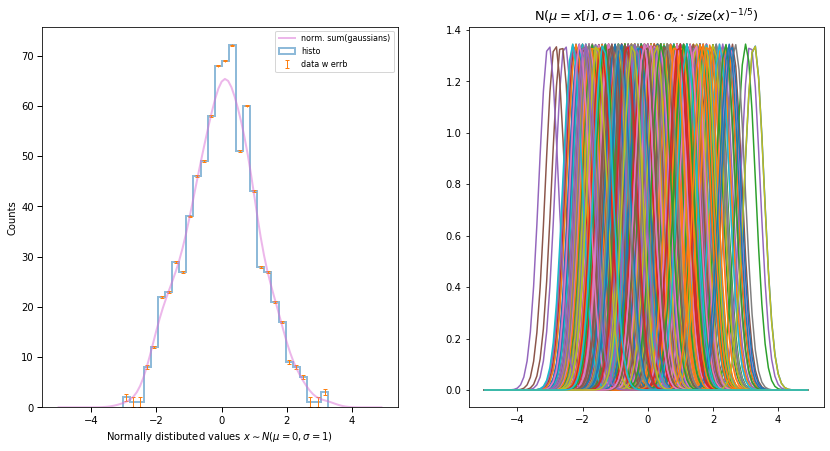

In [34]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
data = ax1.hist(x, bins=b, alpha=0.5, histtype = 'step', linewidth = 2, label = 'histo')
ax1.set_xlabel("Normally distibuted values $x \sim N(\mu = 0, \sigma = 1)$")
ax1.set_ylabel("Counts")
ax1.tick_params(which='major', width=1.0)
ax1.tick_params(which='major', length=5)
bin_centers = (b[:-1] + b[1:])/2.
err = 1/np.sqrt(data[0]) 
ax1.errorbar(bin_centers, data[0], yerr=err, fmt='|', elinewidth = 1.0, markersize = 2, capsize = 2.0, label = 'data w errb')
x_axis = np.arange(-5.0, 5.0, 0.1)
def gauss(m=x, sigma = 1.06*x.std()*(x.size)**(-1/5)):
    return np.array([(norm.pdf(x_axis, loc = i, scale = sigma)) for i in m])
for i in gauss(): ax2.plot(x_axis, i)
ax2.set_title("N($\mu = x[i], \sigma = 1.06 \cdot \sigma_x \cdot size(x)^{-1/5}$)", size = 13)

ahisto = np.sum((b[1]-b[0])*data[0])
sumgaus = np.sum(gauss(), axis = 0)
integ = trapz(sumgaus, axis = 0)
N = ahisto/800
ax1.plot(x_axis, np.sum(gauss(), axis = 0)*N, color = 'orchid', linewidth = 2, alpha = 0.5, label = "norm. sum(gaussians)")
ax1.legend(prop = {'size' : 8})
print("The area of the histogram is {:.5} and the area of the sum of the gaussians is {:.5}".format(ahisto, integ))
print("The normalization is {:.5}".format(N))

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [26]:
mark = ["o", "s", "D", "d", "h", "H", "X", "8", "p", "*",] #10 elements
col = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "cyan", "olive",]
edgec = ["red", "green", "gray", "pink", "brown", "purple", "olive", "cyan", "orange", "blue"]

Text(0, 0.5, 'y')

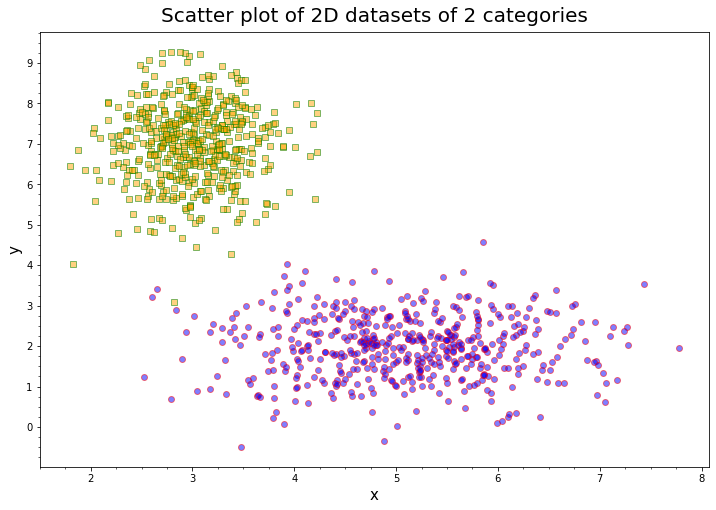

In [27]:
mex = []
cox = []
mey = []
coy = []
num = 500 #number of points
#randomly generate means and covariances both for x-axis and y-axis
for i in range(2): 
    mx = np.random.randint(10)
    cx = np.random.rand()
    my = np.random.randint(10)
    cy = np.random.rand()
    mex.append(mx)
    cox.append(cx)
    mey.append(my)
    coy.append(cy)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
def gaus2d(mx, cx, my, cy): 
    x = [np.random.normal(mx[i], cx[i], size = 500) for i in range(2)]
    y = [np.random.normal(my[i], cy[i], size = 500) for i in range(2)]
    p = [ax.scatter(x=x[i], y=y[i], marker=mark[i], c=col[i], edgecolor=edgec[i], alpha = 0.5) for i in range(2)]
gaus2d(mex, cox, mey, coy)
ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Scatter plot of 2D datasets of 2 categories", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("x", fontsize = 15)
ax.set_ylabel("y", fontsize = 15)

In [51]:
mux = []
covx = []
muy = []
covy = []
N = 4 #number of categories you want
num = 500 #number of points
#randomly generate means and cov matrices (positive semi definite) both for x-axis and y-axis
for i in range(N): 
    mx = np.random.randint(10)
    cx = uniform(1, 2)
    mux.append(mx)
    covx.append(cx)
    my = np.random.randint(10)
    cy = uniform(1, 2)
    muy.append(my)
    covy.append(cy)

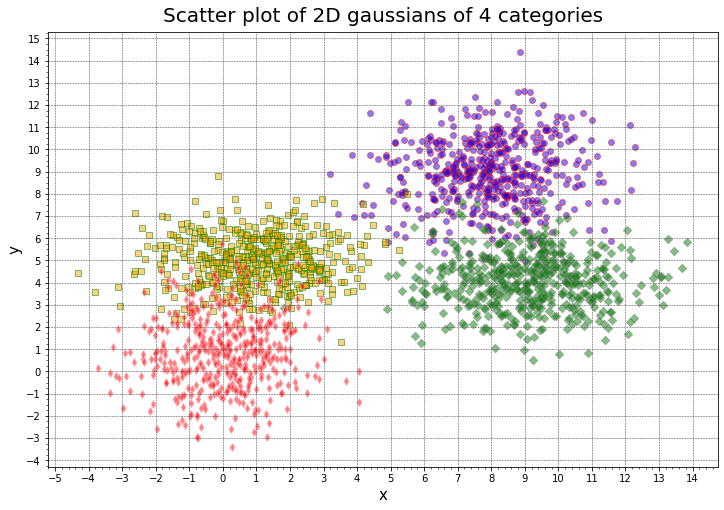

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
mark = ["o", "s", "D", "d", "h", "H", "X", "8", "p", "*",] #10 elements
col = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "cyan", "olive",]
edgec = ["red", "green", "gray", "pink", "brown", "purple", "olive", "cyan", "orange", "blue"]
ax.xaxis.set_major_locator(MultipleLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Scatter plot of 2D gaussians of {} categories".format(N), fontsize=20, verticalalignment='bottom')
ax.set_xlabel("x", fontsize = 15)
ax.set_ylabel("y", fontsize = 15)
ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
def gaus2d(meansx, meansy, covariancesx, covariancesy, number): #number=number of points
    x = [np.random.normal(meansx[i], covariancesx[i], size = number) for i in range(N)]
    y = [np.random.normal(meansy[i], covariancesy[i], size = number) for i in range(N)]
    plot = [ax.scatter(x = x[i], y = y[i], marker = mark[i], c = col[i], edgecolor = edgec[i], alpha = 0.5) for i in range(N)]
    return(plot)
gaus2d(mux, muy, covx, covy, num)

Text(0, 0.5, 'y')

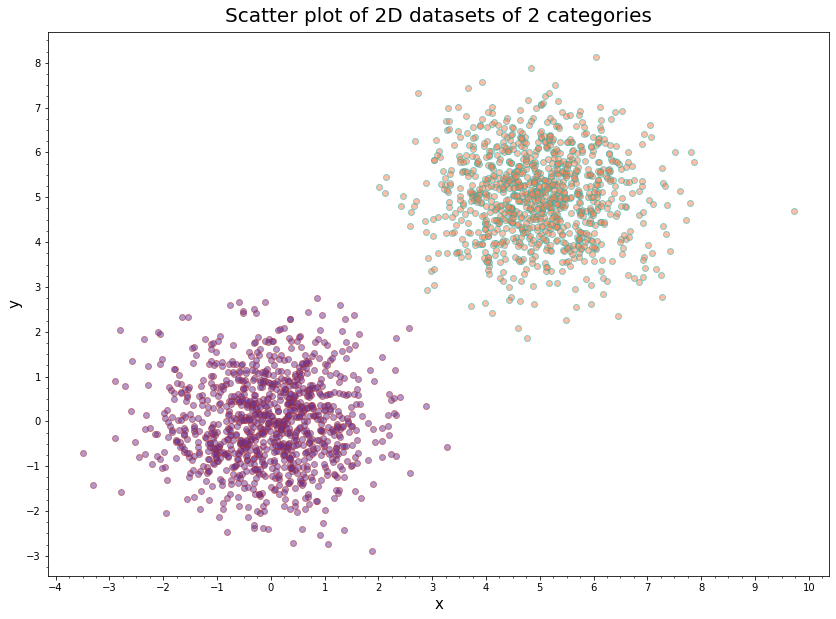

In [20]:
#at first I got the exercise wrong and I made it so that it generates normal distributions with two peaks, I leave it here 
#anyway. I basically plotted a multivariate random distribution both on x and on y, both with different means and cov matrices.

#declare means and cov matrices; since there are only two gaussians I chose some specific values, to be changed if one wants. 
mean1x = [0, 0]
cov1x = [[1, 0], [0, 1]]
mean2x = [5, 5]
cov2x = [[1, 0.5], [0.5, 1]]
mean1y = [0, 0]
cov1y = [[1, 0], [0, 1]]
mean2y = [5, 5]
cov2y = [[1, 0.5], [0.5, 1]]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 10))
def gaus2d(m1, c1, m2, c2): 
    x1 = np.random.multivariate_normal(mean1x, cov1x, size = 500)
    y1 = np.random.multivariate_normal(mean1y, cov1y, size = 500)
    x2 = np.random.multivariate_normal(mean2x, cov2x, size = 500)
    y2 = np.random.multivariate_normal(mean2y, cov2y, size = 500)
    ax.scatter(x=x1, y=y1, marker='o', c='rebeccapurple', edgecolor='brown', alpha =0.5)
    ax.scatter(x=x2, y=y2, marker='o', c='coral', edgecolor='lightseagreen', alpha =0.5)
gaus2d(mean1x, cov1x, mean2y, cov2y)
ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Scatter plot of 2D datasets of 2 categories", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("x", fontsize = 15)
ax.set_ylabel("y", fontsize = 15)

In [23]:
#since there are more than 2 categories I decided to make a for cicle to randomly generate means and cov matrices (so that are 
#positive semi definite). This generates a distribution with two peaks but one can change the number of peaks by giving
#in input more means and a bigger covariance matrix.
mux = []
covx = []
muy = []
covy = []
N = 3 #number of categories you want
num = 500 #number of points
#randomly generate means and cov matrices (positive semi definite) both for x-axis and y-axis
for i in range(N): 
    mx = [np.random.randint(10), np.random.randint(10)]
    cx = np.random.rand(2,2)
    cox = np.dot(cx, cx.transpose())
    mux.append(mx)
    covx.append(cox)
    my = [np.random.randint(10), np.random.randint(10)]
    cy = np.random.rand(2,2)
    coy = np.dot(cy, cy.transpose())
    muy.append(my)
    covy.append(coy)

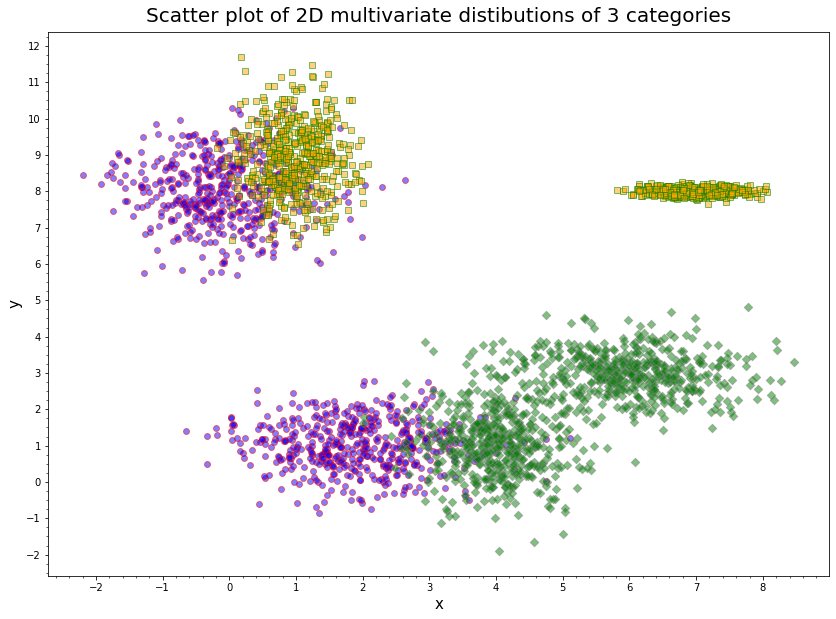

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 10))
mark = ["o", "s", "D", "d", "h", "H", "X", "8", "p", "*",] #10 elements
col = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "cyan", "olive",]
edgec = ["red", "green", "gray", "pink", "brown", "purple", "olive", "cyan", "orange", "blue"]
ax.xaxis.set_major_locator(MultipleLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Scatter plot of 2D multivariate distibutions of {} categories".format(N), fontsize=20, verticalalignment='bottom')
ax.set_xlabel("x", fontsize = 15)
ax.set_ylabel("y", fontsize = 15)
def gaus2d(meansx, meansy, covariancesx, covariancesy, number): #number=number of points
    x = [np.random.multivariate_normal(meansx[i], covariancesx[i], size = number) for i in range(N)]
    y = [np.random.multivariate_normal(meansy[i], covariancesy[i], size = number) 
         for i in range(N)]
    plot = [ax.scatter(x = x[i], y = y[i], marker = mark[i], c = col[i], edgecolor = edgec[i], alpha = 0.5) for i in range(N)]
    return(plot)
gaus2d(mux, muy, covx, covy, num)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [8]:
import pandas as pd
from scipy.stats import linregress
import seaborn as sns

In [9]:
res = np.load("/mnt/c/Users/ASUS/data/residuals_261.npy", allow_pickle = True).item()
df = pd.DataFrame(res)
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [10]:
df = df.drop(df[df.residuals < -2].index)
df = df.drop(df[df.residuals > 2].index)
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [11]:
reg = linregress(df.distances, df.residuals)

Text(0, 0.5, 'Residuals')

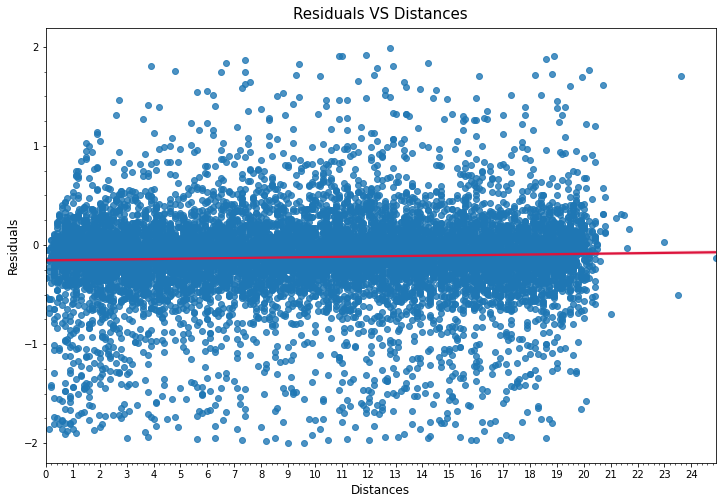

In [12]:
figure, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
ax3 = sns.regplot(x = "distances", y = "residuals", data = df, line_kws = {"color" : "crimson"})
ax3.xaxis.set_major_locator(MultipleLocator())
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_major_locator(MultipleLocator(1.000))
ax3.yaxis.set_minor_locator(AutoMinorLocator(4))
ax3.set_title("Residuals VS Distances", fontsize=15, verticalalignment='bottom')
ax3.set_xlabel("Distances", fontsize = 12)
ax3.set_ylabel("Residuals", fontsize = 12)

In [13]:
bi = np.histogram_bin_edges(df.distances, bins='sqrt')
bi = bi[bi<20]
x = np.array((bi[:-1] + bi[1:])/2.)

In [14]:
y = np.array([(np.mean(df.loc[(df.distances > bi[i]) & (df.distances < bi[i+1])].residuals)) for i in range(len(bi)-1)])
erry = np.array([(np.std(df.loc[(df.distances > bi[i]) & (df.distances < bi[i+1])].residuals)) for i in range(len(bi)-1)])
dic = {"x" : x, "y" : y}
dfxy = pd.DataFrame(data = dic)

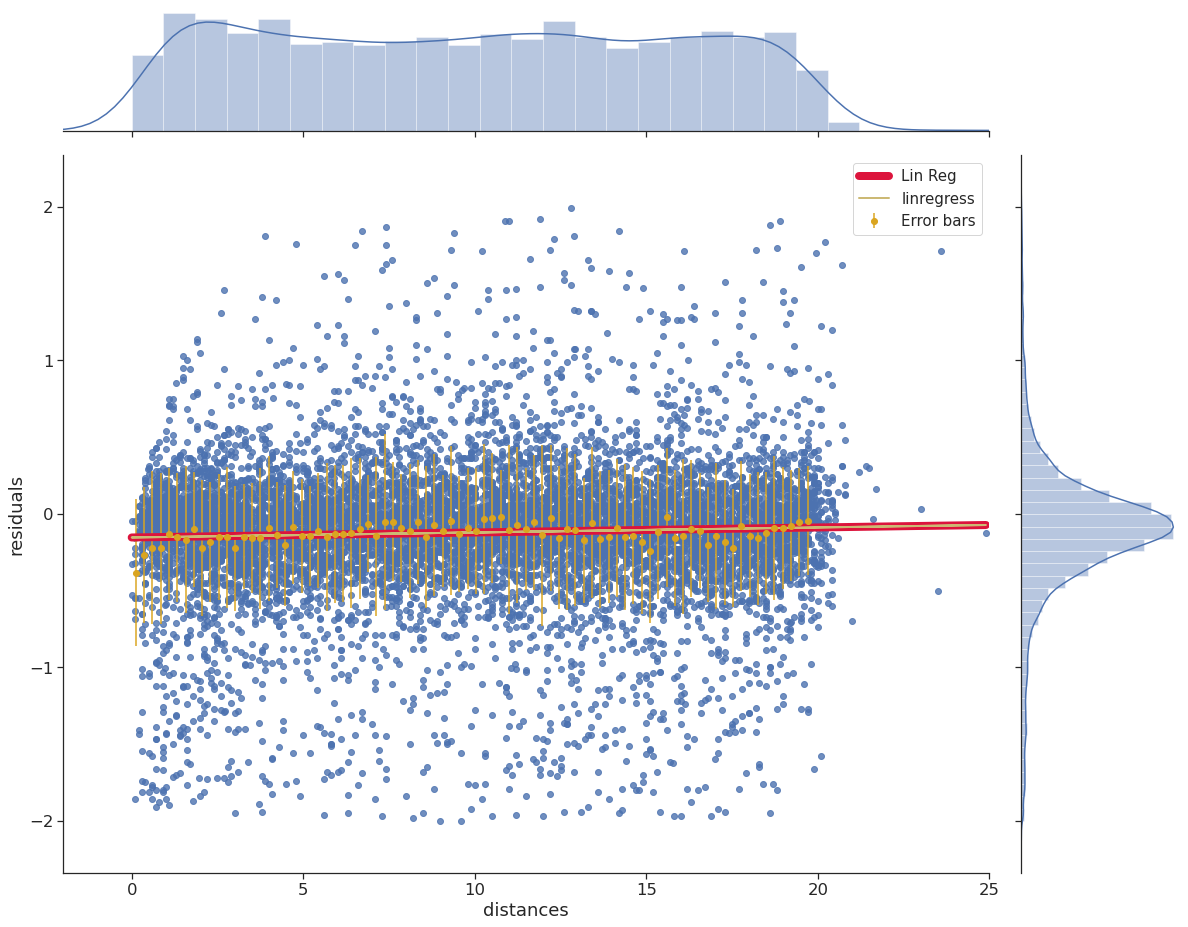

In [21]:
sns.set(style = 'ticks', font_scale = 1.5)
sns.color_palette("muted")
g = sns.jointplot(x = 'distances', y = 'residuals', data = df, kind = "reg", xlim = [-2,25], 
              line_kws = {"color" : "crimson", "label" : "Lin Reg", "lw" : 8})
plt.errorbar(x, y, erry, label = "Error bars", fmt = 'o', c = "goldenrod")
slope, intercept, r_value, p_value, std_err = linregress(df.distances, df.residuals)
plt.plot(df.distances, intercept + slope*df.distances, 'y', linewidth = 2, label = "linregress")
plt.legend(loc = "best", fontsize = 15)
g.fig.set_figwidth(20)
g.fig.set_figheight(15)